# <center>Laboratorium 11<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

**Cel zajęć:**  
Celem zajęć jest zapoznanie się z metodami całkowania numerycznego funkcji:  
$$
\int\limits_{a}^{b}f(x)dx 
$$  

Dana jest funkcja $f(x)$, należy wyznaczyć wartość całki tej funkcji na przedziale $a$,$b$.


***Zadanie 1.***    
Wyznacz numerycznie wartość całki:   
$$
\int\limits_{a}^{b}\log(1+\tan(x))dx 
$$

Wykonaj następujące czynności:

1. Czy możliwe jest całkowanie podanej funkcji na dowolnym przedziale? Swoją odpowiedź uzasadnij.
2. Oblicz całkę numerycznie na przedziale $a =0$, $b=\cfrac{\pi}{4}$ przy pomocy następujących metod:  
    1. Metoda Trapezów - [trapz](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.trapz.html#scipy.integrate.trapz)
    2. Metoda Simpsona - [simps](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simps.html#scipy.integrate.simps) 
    3. Metoda Romberga - [romb](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.romb.html#scipy.integrate.romb)  
  
Sprawdź jak wyniki róźnią się od siebie, czy ma na nie wpływ długość wektora $\mathbf{y}$ oraz wartość parametru $dx$

3. Porównaj wyniki i czas obliczeń z punktu 1 z funkcjami:
    1. [quad](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy-integrate-quad)
    2. [romberg](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.romberg.html#scipy.integrate.romberg)
    3. [quadrature](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quadrature.html#scipy.integrate.quadrature)

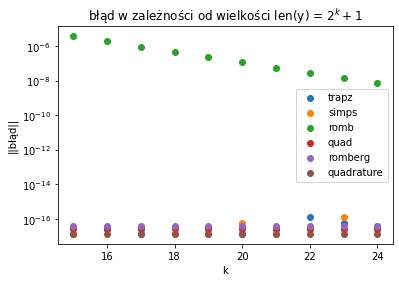

In [30]:
import numpy as np
import scipy.integrate as spint
import matplotlib.pyplot as plt
ticks = ["trapz","simps","romb","quad","romberg","quadrature"]
f = lambda x: np.log10(1 + np.tan(x))
BND = [0,np.pi/4]
## calka z wolframa
poprawna = 0.1182142028610163294538369801357034075338486548291647103859235545656153957710426158213601416325581683
vect_err = []
x_err = list(range(15,25))
for k in range(15,25):
    x = np.linspace(BND[0],BND[1],2**k+1)
    d_x = (BND[1]+BND[0])/(2**k+1)
    trapz = spint.trapz(f(x),x,dx = d_x)
    simps = spint.simps(f(x),x,dx = d_x)
    romb = spint.romb(f(x),d_x)
    quad = spint.quad(f,BND[0],BND[1])
    romberg = spint.romberg(f,BND[0],BND[1])
    quadrature = spint.quadrature(f,BND[0],BND[1])
    err = abs(np.array([trapz,simps,romb,quad[0],romberg,quadrature[0]]) - poprawna)
    vect_err.append(err)
for index,i in enumerate(np.array(vect_err).T):
    plt.scatter(x_err,i,label = ticks[index])
plt.yscale("log")
plt.legend()
plt.title("błąd w zależności od wielkości len(y) = $2^k + 1$")
plt.ylabel("||błąd||")
plt.xlabel("k")
plt.show()


57.8 µs ± 12.9 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
79.7 µs ± 3.78 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
210 µs ± 22 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
74.5 µs ± 10.6 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
50.5 µs ± 3.72 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
55.4 µs ± 2.96 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
66.5 µs ± 7.3 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
123 µs ± 15.5 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
236 µs ± 28.4 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
73.4 µs ± 5.47 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
52.6 µs ± 5.9 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
61 µs ± 7.42 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
98.6 µs ± 8.47 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
136 µs ± 5.65 µs per loop (mean ± std. dev. of 10 runs, 100 

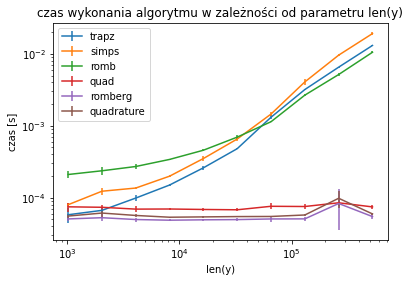

In [31]:
ticks = ["trapz","simps","romb","quad","romberg","quadrature"]
f = lambda x: np.log10(1 + np.tan(x))
BND = [0,np.pi/4]
## calka z wolframa

vect_std = []
vect_avg = []
x_err = [2**i + 1 for i in range(10,20)]
for k in range(10,20):
    x = np.linspace(BND[0],BND[1],2**k+1)
    d_x = (BND[1]+BND[0])/(2**k+1)
    vect_avg_m = [0 for i in range(6)]
    vect_std_m = [0 for i in range(6)]
    saved_timing = %timeit -r 10 -n 100 -o spint.trapz(f(x),x,dx = d_x)
    vect_avg_m[0] = saved_timing.average
    vect_std_m[0] = saved_timing.stdev
    saved_timing = %timeit -r 10 -n 100 -o spint.simps(f(x),x,dx = d_x)
    vect_avg_m[1] = saved_timing.average
    vect_std_m[1] = saved_timing.stdev
    saved_timing = %timeit -r 10 -n 100 -o spint.romb(f(x),d_x)
    vect_avg_m[2] = saved_timing.average
    vect_std_m[2] = saved_timing.stdev 
    saved_timing = %timeit -r 10 -n 100 -o spint.quad(f,BND[0],BND[1])
    vect_avg_m[3] = saved_timing.average
    vect_std_m[3] = saved_timing.stdev
    saved_timing = %timeit -r 10 -n 100 -o spint.romberg(f,BND[0],BND[1])
    vect_avg_m[4] = saved_timing.average
    vect_std_m[4] = saved_timing.stdev
    saved_timing = %timeit -r 10 -n 100 -o spint.quadrature(f,BND[0],BND[1])
    vect_avg_m[5] = saved_timing.average
    vect_std_m[5] = saved_timing.stdev 
    vect_avg.append(vect_avg_m)
    vect_std.append(vect_std_m)

vect_std = np.array(vect_std).T
for index,i in enumerate(np.array(vect_avg).T):
    plt.errorbar(x_err,i,yerr = vect_std[index] ,label = ticks[index])
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.title("czas wykonania algorytmu w zależności od parametru len(y)")
plt.ylabel("czas [s]")
plt.xlabel("len(y)")
plt.show()

## odpowiedzi na pytania
1) nie jest możliwe całkowanie funkcji $log(1+tan(x))$ na dowolnym przedziale poniewarz funkcja ta nie jest ciągła na danym przedziale a przynajmniejj ta ciągłość jest nieusuwalna.
3) dokładność funkcji zależy od parametru dx oraz parametru długości wektora y(im mniejsze dx tym większa dokładność).

***Zadanie 2.***  
Dla funkcji 

$$f(x) = e^{x^2}$$

wyznacz numerycznie wartośc całki na przedziale $a = 0$, $b=1$  w  taki sam sposób jak w zadaniu 1.

[array([4.32059192e-07, 2.74891221e-13, 1.42697731e-03, 0.00000000e+00,
       2.92166291e-12, 1.08857368e-11]), array([1.08014811e-07, 1.73194792e-14, 7.13836870e-04, 0.00000000e+00,
       2.92166291e-12, 1.08857368e-11]), array([2.70037037e-08, 1.33226763e-15, 3.57005552e-04, 0.00000000e+00,
       2.92166291e-12, 1.08857368e-11]), array([6.75092604e-09, 0.00000000e+00, 1.78524563e-04, 0.00000000e+00,
       2.92166291e-12, 1.08857368e-11]), array([1.68773151e-09, 0.00000000e+00, 8.92677294e-05, 0.00000000e+00,
       2.92166291e-12, 1.08857368e-11]), array([4.21932933e-10, 0.00000000e+00, 4.46352268e-05, 0.00000000e+00,
       2.92166291e-12, 1.08857368e-11]), array([1.05483400e-10, 0.00000000e+00, 2.23179539e-05, 0.00000000e+00,
       2.92166291e-12, 1.08857368e-11]), array([2.63709055e-11, 0.00000000e+00, 1.11590621e-05, 0.00000000e+00,
       2.92166291e-12, 1.08857368e-11]), array([6.59294841e-12, 0.00000000e+00, 5.57955233e-06, 0.00000000e+00,
       2.92166291e-12, 1.0885736

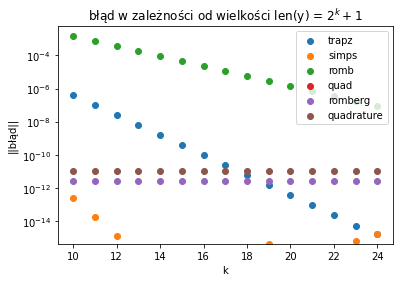

In [27]:
import numpy as np
import scipy.integrate as spint
import matplotlib.pyplot as plt
ticks = ["trapz","simps","romb","quad","romberg","quadrature"]
f = lambda x: np.exp(np.power(x,2))
BND = [0,1]
## calka z wolframa
poprawna = 1.4626517459071816088040485868569881551208700962167391856601145802
vect_err = []
x_err = list(range(10,25))
for k in range(10,25):
    x = np.linspace(BND[0],BND[1],2**k+1)
    d_x = (BND[1]+BND[0])/(2**k+1)
    trapz = spint.trapz(f(x),x,dx = d_x)
    simps = spint.simps(f(x),x,dx = d_x)
    romb = spint.romb(f(x),d_x)
    quad = spint.quad(f,BND[0],BND[1])
    romberg = spint.romberg(f,BND[0],BND[1])
    quadrature = spint.quadrature(f,BND[0],BND[1])
    err = abs(np.array([trapz,simps,romb,quad[0],romberg,quadrature[0]]) - poprawna)
    vect_err.append(err)
for index,i in enumerate(np.array(vect_err).T):
    plt.scatter(x_err,i,label = ticks[index])
print(vect_err)
plt.legend()
plt.title("błąd w zależności od wielkości len(y) = $2^k + 1$")
plt.ylabel("||błąd||")
plt.xlabel("k")
plt.yscale("log")
plt.show()

74.7 µs ± 4.97 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
115 µs ± 5.42 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
228 µs ± 19.5 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
77.8 µs ± 5.52 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
358 µs ± 22.2 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
205 µs ± 18.9 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
100 µs ± 3.52 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
171 µs ± 17.7 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
290 µs ± 21.8 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
77.7 µs ± 7.15 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
333 µs ± 16.4 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
207 µs ± 12.8 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
175 µs ± 8.4 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
232 µs ± 24.5 µs per loop (mean ± std. dev. of 10 runs, 100 lo

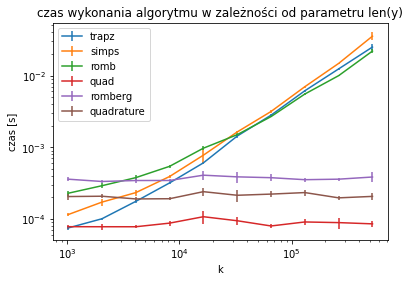

In [29]:
ticks = ["trapz","simps","romb","quad","romberg","quadrature"]
f = lambda x: np.exp(np.power(x,2))
BND = [0,1]
## calka z wolframa

vect_std = []
vect_avg = []
x_err = [2**i + 1 for i in range(10,20)]
for k in range(10,20):
    x = np.linspace(BND[0],BND[1],2**k+1)
    d_x = (BND[1]+BND[0])/(2**k+1)
    vect_avg_m = [0 for i in range(6)]
    vect_std_m = [0 for i in range(6)]
    saved_timing = %timeit -r 10 -n 100 -o spint.trapz(f(x),x,dx = d_x)
    vect_avg_m[0] = saved_timing.average
    vect_std_m[0] = saved_timing.stdev
    saved_timing = %timeit -r 10 -n 100 -o spint.simps(f(x),x,dx = d_x)
    vect_avg_m[1] = saved_timing.average
    vect_std_m[1] = saved_timing.stdev
    saved_timing = %timeit -r 10 -n 100 -o spint.romb(f(x),d_x)
    vect_avg_m[2] = saved_timing.average
    vect_std_m[2] = saved_timing.stdev 
    saved_timing = %timeit -r 10 -n 100 -o spint.quad(f,BND[0],BND[1])
    vect_avg_m[3] = saved_timing.average
    vect_std_m[3] = saved_timing.stdev
    saved_timing = %timeit -r 10 -n 100 -o spint.romberg(f,BND[0],BND[1])
    vect_avg_m[4] = saved_timing.average
    vect_std_m[4] = saved_timing.stdev
    saved_timing = %timeit -r 10 -n 100 -o spint.quadrature(f,BND[0],BND[1])
    vect_avg_m[5] = saved_timing.average
    vect_std_m[5] = saved_timing.stdev 
    vect_avg.append(vect_avg_m)
    vect_std.append(vect_std_m)

vect_std = np.array(vect_std).T
for index,i in enumerate(np.array(vect_avg).T):
    plt.errorbar(x_err,i,yerr = vect_std[index] ,label = ticks[index])
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.title("czas wykonania algorytmu w zależności od parametru len(y)")
plt.ylabel("czas [s]")
plt.xlabel("k")
plt.show()

## Wnioski
wszystkie metody obliczania całek, oprócz metody trapezów(która dopiero przy wysokim len(y) daje zadowalające wyniki), dla pierwszej funkcji dały bardzo duże przybliżenie wyniku z błędem na poziomie epsilon maszynowego. Dla drugiej fukcji wyniki także były zadowalające w szczególności metoda simpsona dała wyniki na poziomie epsilon maszynowego. laboratoria minęły bezproblemowo.